# Leaf Classification

Overview : https://www.kaggle.com/c/leaf-classification <br>
Data : https://www.kaggle.com/c/leaf-classification/data

### Data

- 1584개의 이미지 (99개 종, 각 종별 16개 샘플)
- 이미지는 흰색 배경에 검은색 나뭇잎으로 표현
- 이미지 별 3가지 종류의 feature를 제공 (Shape, Margin, Texture)
- 각 종류 별 64개 feature 보유
<p>

- id : 이미지와 mapping되는 고유 식별자
- margin_1, margin_2, ... , margin_64 : margin feature를 위한 64개의 속성
- shape_1, shape_2, ... , shape_64 : shape feature를 위한 64개의 속성
- texture_1, texture_2, ... , texture_64 : texture feature를 위한 64개의 속성

<table>
    <tr>
        <td rowspan=2>
            ![Shape](./leaf_shape.JPG)
        </td>
        <td>
            ![Texture](./leaf_texture.jpeg)
        </td>
    </tr>
    <tr>
        <td>![Margin](./leaf_margin.jpg)</td>
    </tr>    
</table>

### Evaluation

Multi-class logarithmic loss : 모든 종류의 species에 대해 각 species가 예측될 확률을 제출해야 함

$$log loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij}),$$

[scikit-learn log loss 참조(http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss)](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss)

# EDA

https://www.kaggle.com/rossxsy/eda-and-a-logistic-regression-lb-0-04

### 필요 모듈 로딩

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np

%matplotlib inline

### 데이터 로딩

- Train 990개 데이터 및 194개 column, Test 594개 데이터 및 193개 column
- Train 데이터에는 "species" column이 1개 더 있음

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("Train set shape : {}".format(train.shape))
print("Test set shape : {}".format(test.shape))
print("")
print("Sample data of trainset")
display(train.head())

Train set shape : (990, 194)
Test set shape : (594, 193)

Sample data of trainset


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


### Column 특성 확인

- **id**는 int, label인 **species**는 object(string), 나머지 **margin1~64, shape1~64, texture1~64**는 float
- Null 값을 가진 row/column은 없음

In [3]:
print("Any null included? : {}".format(train.isnull().any().any()))
print()
print("--------------------------------------------------------------")
print("Train info")
print(train.info(verbose=False))
print("--------------------------------------------------------------")
print("Test info")
print(test.info(verbose=False))

Any null included? : False

--------------------------------------------------------------
Train info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB
None
--------------------------------------------------------------
Test info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.7 KB
None


### Categorical Feature EDA

- **species**는 99개의 고유한 category가 존재
- 각 category 별 10개의 데이터가 있음

Unique species in train set : 99
Maximum samples in species : 10
Minimum samples in species : 10


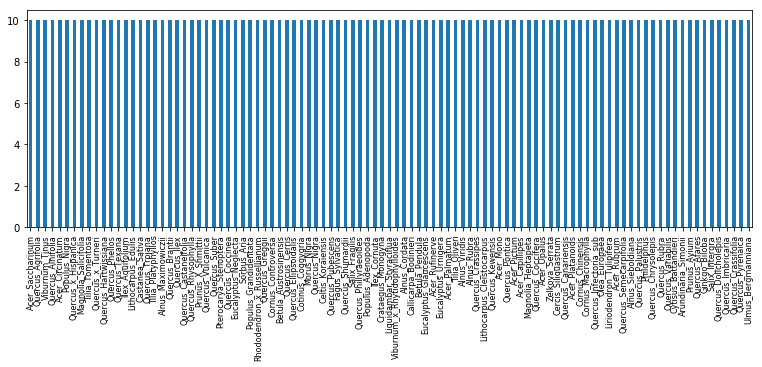

In [4]:
print("Unique species in train set : {}".format(len(train['species'].unique())))
print("Maximum samples in species : {}".format(train.groupby('species')['species'].count().max()))
print("Minimum samples in species : {}".format(train.groupby('species')['species'].count().min()))
fig = plt.figure(figsize=(13, 4))
ax = fig.add_subplot(1,1,1)
train.species.value_counts().plot(kind='bar')
ax.tick_params(axis='x', labelsize=8)

### Numerical Feature EDA

margin1~64, shape1~64, texture1~64는 0~1 사이 값으로 scaling 된 값으로 추정

In [5]:
display(train.loc[:,train.columns != 'id'].describe())

print("Minimum value of features : {}".format(train.loc[:,train.columns !='id'].describe().loc['min'].min()))
print("Maximum value of features : {}".format(train.loc[:,train.columns !='id'].describe().loc['max'].max()))

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


Minimum value of features : 0.0
Maximum value of features : 0.8535200000000001


In [6]:
margin_col = [col for col in train.columns if col.startswith('margin')]
shape_col = [col for col in train.columns if col.startswith('shape')]
texture_col = [col for col in train.columns if col.startswith('texture')]

def setBoxplot(ax, ylim):
    ax.set_ylim(ylim)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9)

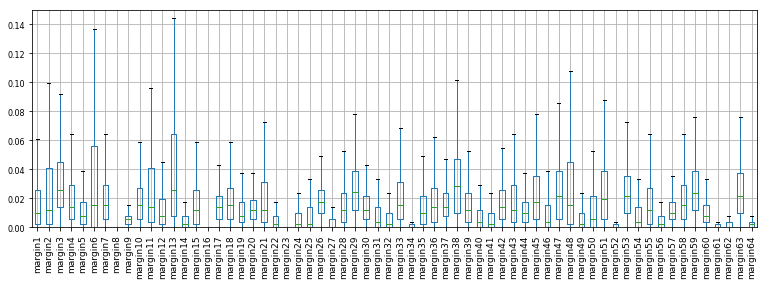

In [7]:
fig = plt.figure(figsize=(13,4))
ax=fig.add_subplot(1,1,1)
train[margin_col].boxplot(sym="")
setBoxplot(ax, [0, 0.15])

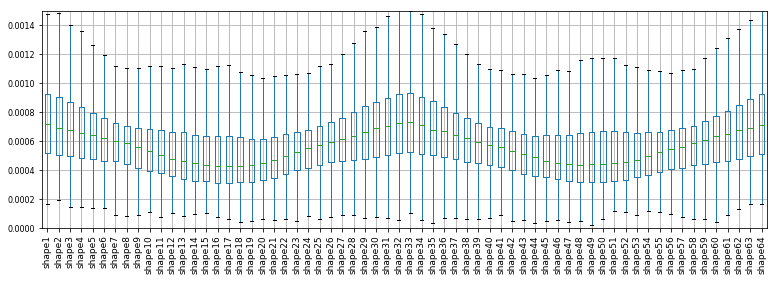

In [8]:
fig = plt.figure(figsize=(13,4))
ax=fig.add_subplot(1,1,1)
train[shape_col].boxplot(sym="")
setBoxplot(ax, [0, 0.0015])

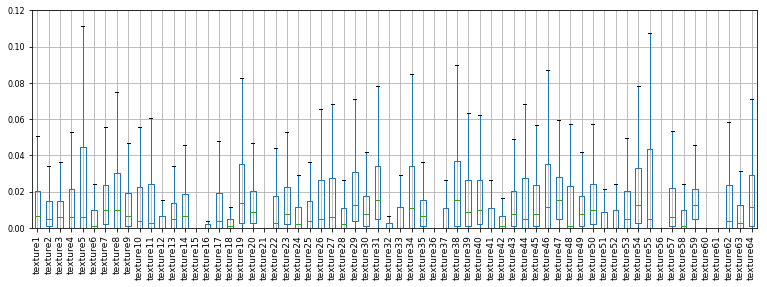

In [9]:
fig = plt.figure(figsize=(13,4))
ax=fig.add_subplot(1,1,1)
train[texture_col].boxplot(sym="")
setBoxplot(ax, [0, 0.12])

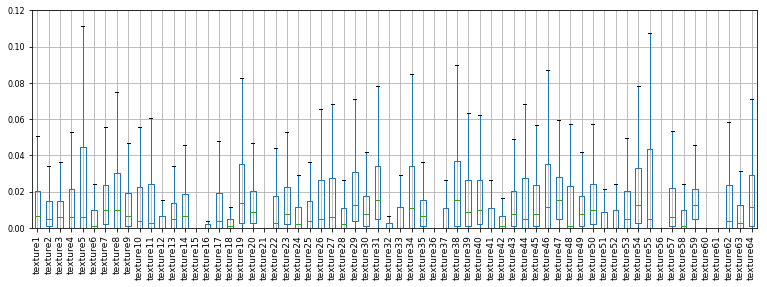

In [10]:
fig = plt.figure(figsize=(13,4))
ax=fig.add_subplot(1,1,1)
train[texture_col].boxplot(sym="")
setBoxplot(ax, [0, 0.12])

### Correlation between features

In [11]:
def correlation_matrix(df,ax1):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    cmap = cm.get_cmap('RdYlBu', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap, vmin=-1.0, vmax=1.0)
    ax1.grid(True)
    labels = df.columns
    ax1.set_xticks(range(0,len(labels)))
    ax1.set_xticklabels(labels,fontsize=7,rotation=90)
    ax1.set_yticks(range(0,len(labels)))
    ax1.set_yticklabels(labels,fontsize=7)
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize=7)
    ax1.grid(b=False)

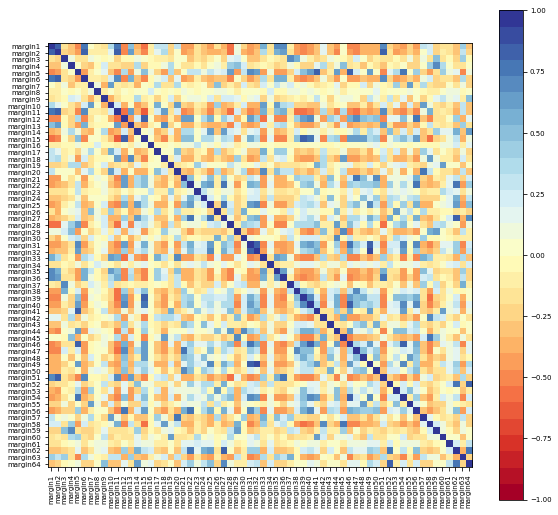

In [12]:
# correlation matrix for margin features
fig = plt.figure(figsize=(9.5,9))
ax = fig.add_subplot(1,1,1)
correlation_matrix(train[margin_col],ax)

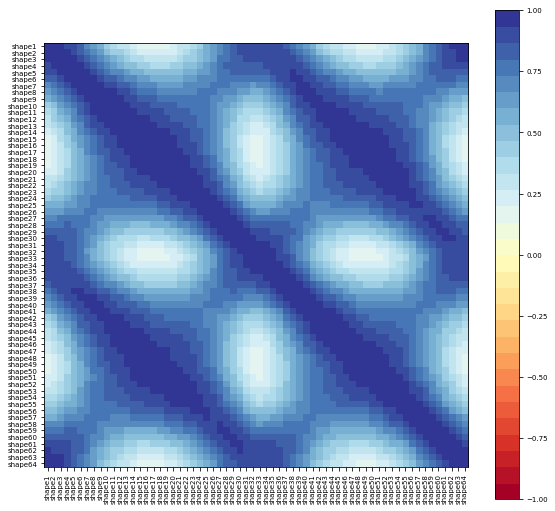

In [13]:
# correlation matrix for shape features
fig = plt.figure(figsize=(9.5,9))
ax = fig.add_subplot(1,1,1)
correlation_matrix(train[shape_col],ax)

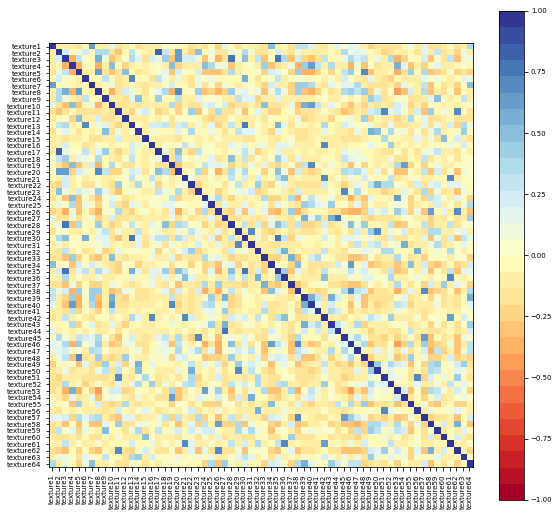

In [14]:
# correlation matrix for texture features
fig = plt.figure(figsize=(9.5,9))
ax = fig.add_subplot(1,1,1)
correlation_matrix(train[texture_col],ax)

### 생각해 볼 점

- shape과 margin에 상관관계가 높은 변수들이 있으므로, 차원축소를 통해 변수를 줄일 수 있을 듯

# Visualization with K-Means

https://www.kaggle.com/selfishgene/visualizing-k-means-with-leaf-dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import model_selection
from sklearn import decomposition
from sklearn import linear_model
from sklearn import cluster
from sklearn import ensemble
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KernelDensity
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score

from skimage.transform import rescale
from scipy import ndimage as ndi

matplotlib.style.use('fivethirtyeight')

### Data Loading and preparation phase

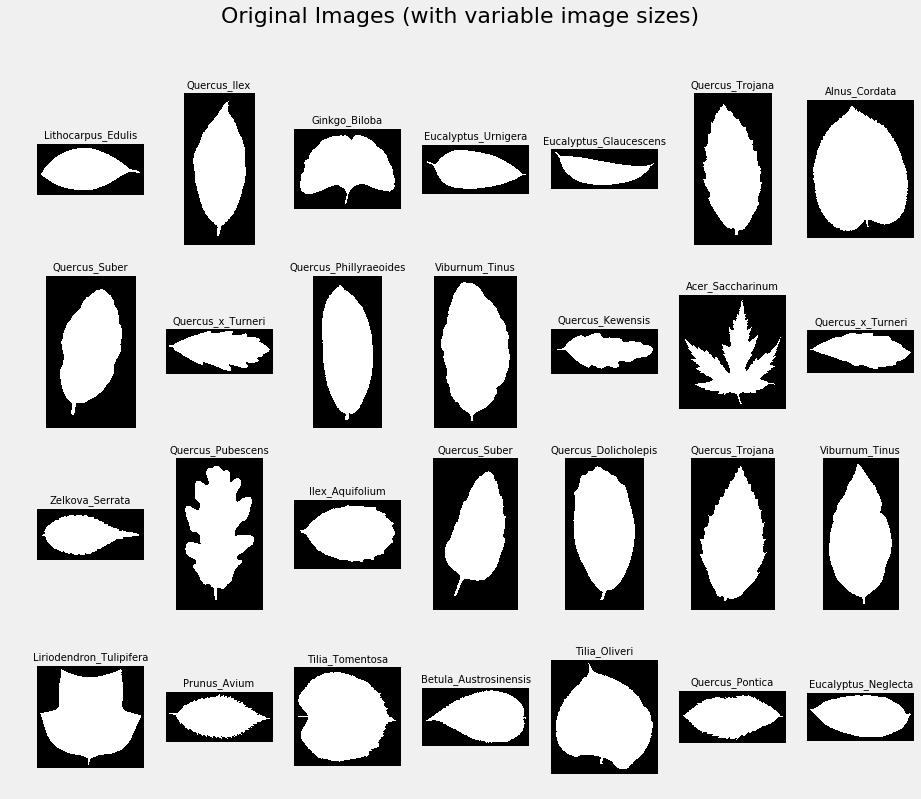

In [16]:
#%% load the data
dataDir   = './'
trainData = pd.read_csv(dataDir + 'train.csv')
classEncoder = LabelEncoder()
trainLabels  = classEncoder.fit_transform(trainData.loc[:,'species'])
trainIDs     = np.array(trainData.loc[:,'id'])

# show some random images
plt.figure(figsize=(14,12))
plt.suptitle('Original Images (with variable image sizes)', fontsize=22)
for k in range(28):
    randTrainInd = np.random.randint(len(trainIDs))
    randomID = trainIDs[randTrainInd]
    imageFilename = dataDir + 'images/' + str(randomID) + '.jpg'
    plt.subplot(4,7,k+1); plt.imshow(mpimg.imread(imageFilename), cmap='gray')
    plt.title(classEncoder.classes_[trainLabels[randTrainInd]], fontsize=10); plt.axis('off')

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


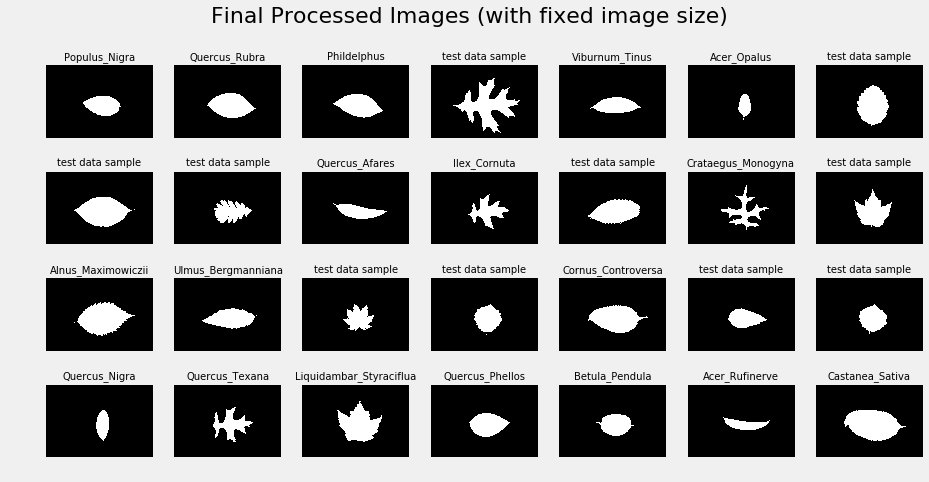

In [17]:
#%% preprocess images

# go over training images and store them in a list
numImages = 1584

shapesMatrix = np.zeros((2,numImages))
listOfImages = []
for k in range(numImages):
    imageFilename = dataDir + 'images/' + str(k+1) + '.jpg'
    currImage = mpimg.imread(imageFilename)
    shapesMatrix[:,k] = np.shape(currImage)
    listOfImages.append(currImage)
    
# calculate the shape of an image that will contain all original images within it
maxShapeSize = shapesMatrix.max(axis=1)
for k in range(len(maxShapeSize)):
    if maxShapeSize[k] % 2 == 0:
        maxShapeSize[k] += 311
    else:
        maxShapeSize[k] += 310
    
    
# place all original images at the center of the large reference frame
fullImageMatrix3D = np.zeros(np.hstack((maxShapeSize, np.shape(shapesMatrix[1]))).astype(int),dtype=np.dtype('u1'))
destXc = (maxShapeSize[1]+1)/2; destYc = (maxShapeSize[0]+1)/2
for k, currImage in enumerate(listOfImages):
    Yc, Xc = ndi.center_of_mass(currImage)
    Xd = destXc - Xc; Yd = destYc - Yc
    rowIndLims = (int(round(Yd)),int(round(Yd)+np.shape(currImage)[0]))
    colIndLims = (int(round(Xd)),int(round(Xd)+np.shape(currImage)[1]))
    fullImageMatrix3D[rowIndLims[0]:rowIndLims[1],colIndLims[0]:colIndLims[1],k] = currImage

'''
# make sure nothing was ruined in the process
plt.figure(figsize=(14,7))
plt.suptitle('Processed Images (fixed size)', fontsize=22)
for k in range(28):
    randInd = np.random.randint(np.shape(fullImageMatrix3D)[2])
    plt.subplot(4,7,k+1); plt.imshow(fullImageMatrix3D[:,:,randInd], cmap='gray'); plt.axis('off')
'''

# re crop according to rows and columns that don't have zeros in them in any image
xValid = fullImageMatrix3D.mean(axis=2).sum(axis=0) > 0
yValid = fullImageMatrix3D.mean(axis=2).sum(axis=1) > 0
xLims = (np.nonzero(xValid)[0][0],np.nonzero(xValid)[0][-1])
yLims = (np.nonzero(yValid)[0][0],np.nonzero(yValid)[0][-1])
fullImageMatrix3D = fullImageMatrix3D[yLims[0]:yLims[1],xLims[0]:xLims[1],:]

# make sure nothing was ruined in the process
plt.figure(figsize=(14,7))
plt.suptitle('Final Processed Images (with fixed image size)', fontsize=22)
for k in range(28):
    randInd = np.random.randint(np.shape(fullImageMatrix3D)[2])
    plt.subplot(4,7,k+1); plt.imshow(fullImageMatrix3D[:,:,randInd], cmap='gray'); plt.axis('off')
    if randInd < len(trainLabels):
        plt.title(classEncoder.classes_[trainLabels[randInd]], fontsize=10)
    else:
        plt.title('test data sample', fontsize=10)
        
# scale down all images to be in normal size
rescaleFactor = 0.15

scaledDownImage = rescale(fullImageMatrix3D[:,:,0],rescaleFactor)
scaledDownImages = np.zeros(np.hstack((np.shape(scaledDownImage),
                                       np.shape(fullImageMatrix3D)[2])),dtype=np.dtype('f4'))
for imInd in range(np.shape(fullImageMatrix3D)[2]):
    scaledDownImages[:,:,imInd] = rescale(fullImageMatrix3D[:,:,imInd],rescaleFactor)
    
del fullImageMatrix3D

### Define a Kmeans Model class that will help us visualize things

In [18]:
class KmeansModel:

    def __init__(self, X, numClusters=10, objectPixels=None):
        '''
        inputs: 
            X                       - numSamples x numDimentions matrix
            numClusters             - number of clusters to use
            objectPixels (optional) - an binnary mask image used for presentation
                                      will be used as Im[objectPixels] = dataSample
                                      must satisfy objectPixels.ravel().sum() = X.shape[1]
        '''
        numDataSamples = X.shape[0]
        self.numClusters = numClusters        
        if objectPixels is None:
            self.objectPixels = np.ones((1,X.shape[1]),dtype=np.bool)
        else:
            self.objectPixels = objectPixels
        assert(self.objectPixels.ravel().sum() == X.shape[1])

        KmeansModel = cluster.KMeans(n_clusters=numClusters, n_init=5)
        self.dataRepresentation = KmeansModel.fit_transform(X)
        self.KmeansModel = KmeansModel
        
        # calculate cluster frequency
        clusterInds = KmeansModel.labels_
        clusterFrequency = []
        for clusterInd in range(numClusters):
            clusterFrequency.append((clusterInds == clusterInd).sum()/float(numDataSamples))
        self.clusterFrequency = np.array(clusterFrequency)
        self.sortedTemplatesByFrequency = np.flipud(np.argsort(clusterFrequency))

    def RepresentUsingModel(self, X, representationMethod='distFromAllClusters'):
        
        if representationMethod == 'distFromAllClusters':
            return self.KmeansModel.transform(X)
        if representationMethod == 'clusterIndex':
            return self.KmeansModel.predict(X)
        if representationMethod == 'oneHotClusterIndex':
            clusterAssignment = self.KmeansModel.predict(X)
            X_transformed = np.zeros((X.shape[0],self.numClusters))
            for sample in range(X.shape[0]):
                X_transformed[sample,clusterAssignment[sample]] = 1
            return X_transformed

    def ReconstructUsingModel(self, X_transformed, representationMethod='distFromAllClusters'):

        if representationMethod == 'clusterIndex':
            clusterAssignment = X_transformed
        if representationMethod == 'oneHotClusterIndex':
            clusterAssignment = np.argmax(X_transformed,axis=1)
        if representationMethod == 'distFromAllClusters':
            clusterAssignment = np.argmin(X_transformed,axis=1)

        X_reconstructed = np.zeros((X_transformed.shape[0],self.KmeansModel.cluster_centers_.shape[1]))
        for sample in range(X_transformed.shape[0]):
            X_reconstructed[sample,:] = self.KmeansModel.cluster_centers_[clusterAssignment[sample],:]
                
        return X_reconstructed
        
    def InterpretUsingModel(self, X, representationMethod='clusterIndex'):
        return self.ReconstructUsingModel(\
                        self.RepresentUsingModel(X,representationMethod),representationMethod)

    # shows the cluster centers
    def ShowTemplates(self, numTemplatesToShow=16):
        numTemplatesToShow = min(numTemplatesToShow, self.numClusters)
        
        numFigRows = np.ceil(np.sqrt(numTemplatesToShow)); 
        numFigCols = np.ceil(np.sqrt(numTemplatesToShow));
        numTemplatesPerFigure = int(numFigRows*numFigCols)
        numFigures = int(np.ceil(float(numTemplatesToShow)/numTemplatesPerFigure))
                
        for figureInd in range(numFigures):
            plt.figure()
            for plotInd in range(numTemplatesPerFigure):
                templateInd = self.sortedTemplatesByFrequency[numTemplatesPerFigure*figureInd + plotInd]
                if templateInd >= self.numClusters:
                    break
                templateImage = np.zeros(np.shape(self.objectPixels))
                templateImage[self.objectPixels] = \
                        self.KmeansModel.cluster_centers_[templateInd,:].ravel()

                plt.subplot(numFigRows,numFigCols,plotInd+1)
                if np.shape(self.objectPixels)[0] == 1:
                    plt.plot(templateImage)
                else:
                    plt.imshow(templateImage,cmap='hot'); plt.axis('off')
                plt.title(str(100*self.clusterFrequency[templateInd])[:4] + '% frequency');
            plt.tight_layout()
            
    # shows several random model reconstructions
    def ShowReconstructions(self, X, numReconstructions=6):
        assert(np.shape(X)[1] == self.objectPixels.ravel().sum())
        numSamples = np.shape(X)[0]
        numReconstructions = min(numReconstructions, numSamples)
        
        originalImage      = np.zeros(np.shape(self.objectPixels))
        reconstructedImage = np.zeros(np.shape(self.objectPixels))
        
        numReconstructionsPerFigure = min(6, numReconstructions)
        numFigures = int(np.ceil(float(numReconstructions)/numReconstructionsPerFigure))
        
        for figureInd in range(numFigures):
            plt.figure()
            for plotCol in range(numReconstructionsPerFigure):
                dataSampleInd = np.random.randint(numSamples)
                originalImage[self.objectPixels] = X[dataSampleInd,:].ravel()
                reconstructedImage[self.objectPixels] = \
                        self.InterpretUsingModel(np.reshape(X[dataSampleInd,:],[1,-1])).ravel()
                diffImage = abs(originalImage - reconstructedImage)
                
                # original image
                plt.subplot(3,numReconstructionsPerFigure,0*numReconstructionsPerFigure+plotCol+1)
                if np.shape(self.objectPixels)[0] == 1:
                    plt.plot(originalImage); plt.title('original signal')
                else:
                    plt.imshow(originalImage, cmap='gray'); 
                    plt.title('original image'); plt.axis('off')
                    
                # reconstred image
                plt.subplot(3,numReconstructionsPerFigure,1*numReconstructionsPerFigure+plotCol+1)
                if np.shape(self.objectPixels)[0] == 1:
                    plt.plot(reconstructedImage); plt.title('reconstructed signal')
                else:
                    plt.imshow(reconstructedImage, cmap='gray'); 
                    plt.title('reconstructed image'); plt.axis('off')

                # diff image
                plt.subplot(3,numReconstructionsPerFigure,2*numReconstructionsPerFigure+plotCol+1)
                if np.shape(self.objectPixels)[0] == 1:
                    plt.plot(diffImage); plt.title('abs difference signal')
                else:
                    plt.imshow(diffImage, cmap='gray'); 
                    plt.title('abs difference image'); plt.axis('off')
            plt.tight_layout()


    # shows distrbution along the distance from a particular cluster and several examples for that distance
    def ShowSingleTemplateDistances(self, X, listOfTemplates=[0,1]):

        showAsTraces = (np.shape(self.objectPixels)[0] == 1)
        assert(all([(x in range(self.numClusters)) for x in listOfTemplates]))
                
        X_rep = self.RepresentUsingModel(X, representationMethod='distFromAllClusters')
        
        percentilesToShow = [1,5,10,30,60,99]
        numReadDataSamplePerPercentile = 4
        representationPercentiles = []
        for percentile in percentilesToShow:
            representationPercentiles.append(np.percentile(self.dataRepresentation, percentile, axis=0))
        medianRepVec =  np.percentile(self.dataRepresentation, 50, axis=0)

        for templateInd in listOfTemplates:
            plt.figure(); gs = gridspec.GridSpec(numReadDataSamplePerPercentile+2,
                                                 len(percentilesToShow))

            # calculate the Gaussian smoothed distribution of values along the eignevector direction
            sigmaOfKDE = (representationPercentiles[-1][templateInd] - 
                          representationPercentiles[1][templateInd])/100.0
            pdfStart   = representationPercentiles[1][templateInd]  - 15*sigmaOfKDE
            pdfStop    = representationPercentiles[-1][templateInd] + 15*sigmaOfKDE
            xAxis = np.linspace(pdfStart,pdfStop,200)
            PDF_Model = KernelDensity(kernel='gaussian', \
                            bandwidth=sigmaOfKDE).fit(self.dataRepresentation[:,templateInd].reshape(-1,1))
            logPDF = PDF_Model.score_samples(xAxis.reshape(-1,1))
            percentileValuesToShow = \
                [representationPercentiles[x][templateInd] for x in range(len(representationPercentiles))]
            percentilesToShowLogPDF = \
                PDF_Model.score_samples(np.array(percentileValuesToShow).reshape(-1,1))

            # show distribution of distance from current template and red dots at the list of precentiles to show 
            plt.subplot(gs[0,:])
            plt.fill(xAxis, np.exp(logPDF), fc='b', alpha=0.9);
            plt.scatter(percentileValuesToShow, np.exp(percentilesToShowLogPDF), c='r',s=40);
            plt.title(str(100*self.clusterFrequency[templateInd])[:4] + '% assignment frequency');

            for plotCol, currPrecentile in enumerate(percentilesToShow):                
                currPrecentileRepVec              = medianRepVec.copy()
                currPrecentileRepVec[templateInd] = representationPercentiles[plotCol][templateInd]
                
                currPrecentileImage = np.zeros(np.shape(self.objectPixels))
                currPrecentileRepVec = currPrecentileRepVec[:,np.newaxis].T
                currPrecentileImage[self.objectPixels] = \
                            self.ReconstructUsingModel(currPrecentileRepVec).ravel()
                
                # show the median image with current precentile as activation of the curr image
                plt.subplot(gs[1,plotCol]);
                if showAsTraces:
                    plt.plot(currPrecentileImage); 
                    plt.title('precentile: ' + str(percentilesToShow[plotCol]) + '%')
                else:
                    plt.imshow(currPrecentileImage, cmap='hot'); 
                    plt.title('precentile: ' + str(percentilesToShow[plotCol]) + '%'); plt.axis('off')

                # find the most suitible candidates in X for current precentile
                distFromPercentile = abs(X_rep[:,templateInd] - 
                                         representationPercentiles[plotCol][templateInd])
                X_inds = np.argpartition(distFromPercentile, \
                                         numReadDataSamplePerPercentile)[:numReadDataSamplePerPercentile]
                for k, X_ind in enumerate(X_inds):
                    currNearestPrecentileImage = np.zeros(np.shape(self.objectPixels))
                    currNearestPrecentileImage[self.objectPixels]  = X[X_ind,:].ravel()
                    
                    plt.subplot(gs[2+k,plotCol]);
                    if showAsTraces:
                        plt.plot(currNearestPrecentileImage); 
                        plt.title('NN with closest percentile');
                    else:
                        plt.imshow(currNearestPrecentileImage, cmap='gray'); 
                        plt.title('NN with closest percentile'); plt.axis('off')
            plt.tight_layout()
            
            
    def ShowDataScatterPlotsWithTSNE(self, X=None, y=None, tSNE_perplexity=30.0, colorMap='Paired'):
        # show the distance from 2 most frequent clusters and the tSNE of the entire "distance form template" space 
        
        if X is None:
            X_rep = self.dataRepresentation
        else:
            X_rep = self.RepresentUsingModel(X)
            
        if y is None:
            y = np.ones(X_rep.shape[0])
            
        tSNE_KmeansModel = TSNE(n_components=2, perplexity=tSNE_perplexity, random_state=0)
        X_rep_tSNE = tSNE_KmeansModel.fit_transform(X_rep)
        
        # take the two most frequent patterns
        mostFrequent = self.sortedTemplatesByFrequency[:2]
        
        plt.figure()
        plt.subplot(1,2,1); 
        plt.scatter(X_rep[:,mostFrequent[0]], \
                    X_rep[:,mostFrequent[1]],c=y,cmap=colorMap,s=10,alpha=0.9)
        plt.title('"distance form template" representation'); 
        plt.xlabel('distance from template 1'); plt.ylabel('distance from template 2')
        plt.subplot(1,2,2); 
        plt.scatter(X_rep_tSNE[:,0],X_rep_tSNE[:,1],c=y,cmap=colorMap,s=15,alpha=0.9)
        plt.title('t-SNE of Kmeans representation'); plt.xlabel('t-SNE axis1'); plt.ylabel('t-SNE axis2')


    def ShowTemplatesInPCASpace(self, X, y=None, tSNE_perplexity=30.0, colorMap='Paired'):
        # show the templates in the 2PC space and the tSNE of the entire PCA space
        
        # build PCA model and project the data onto the PCA space
        PCAModel = decomposition.PCA(n_components=60, whiten=False)
        X_rep = PCAModel.fit_transform(X)
                
        # project the Kmeans templates onto the PCA space
        templates_rep = PCAModel.transform(templateModel.KmeansModel.cluster_centers_)
        
        if y is None:
            y = self.RepresentUsingModel(X, representationMethod='clusterIndex')
            
        tSNE_PCAModel = TSNE(n_components=2, perplexity=tSNE_perplexity, random_state=0)
        X_rep_tSNE = tSNE_PCAModel.fit_transform(np.vstack((X_rep,templates_rep))) 
        
        plt.figure()
        plt.subplot(1,2,1); plt.scatter(X_rep[:,0],X_rep[:,1],c=y,cmap=colorMap,s=15,alpha=0.9)
        plt.scatter(templates_rep[:,0],templates_rep[:,1],c='k',cmap=colorMap,s=50)
        plt.title('PCA representation'); plt.xlabel('PC1 coeff'); plt.ylabel('PC2 coeff')
        
        nC = templates_rep.shape[0]        
        plt.subplot(1,2,2); 
        plt.scatter(X_rep_tSNE[:-nC,0],\
                    X_rep_tSNE[:-nC,1],c=y,cmap=colorMap,s=15,alpha=0.9)
        plt.scatter(X_rep_tSNE[-nC:,0],\
                    X_rep_tSNE[-nC:,1],c='k',cmap=colorMap,s=50)
        plt.title('t-SNE of PCA representation'); plt.xlabel('t-SNE axis1'); plt.ylabel('t-SNE axis2')

### For K=4:

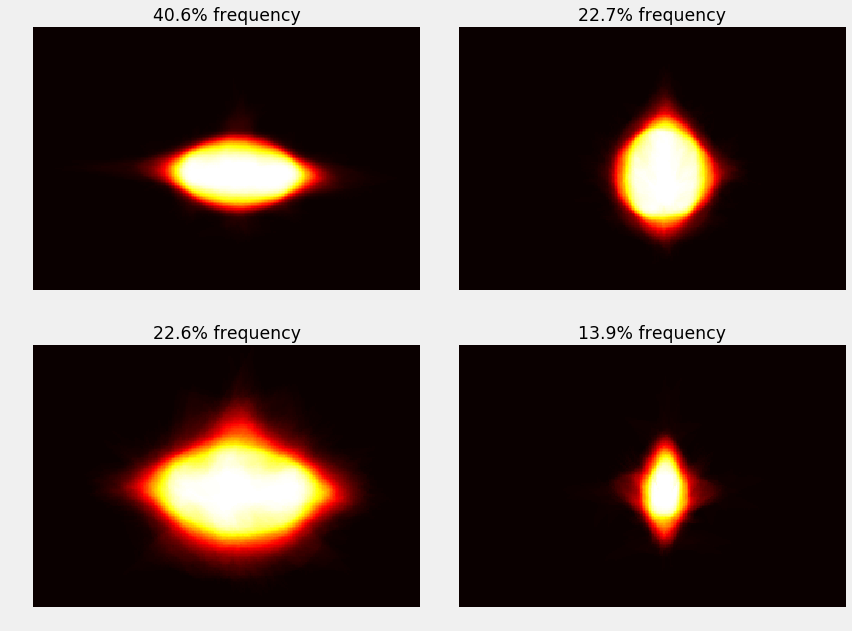

In [19]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12,9)

objectPixels = np.ones((np.shape(scaledDownImages)[0],np.shape(scaledDownImages)[1])) == 1
sampleDim = np.shape(scaledDownImages)[0]*np.shape(scaledDownImages)[1]
X = scaledDownImages.reshape(sampleDim,-1).T

templateModel = KmeansModel(X, numClusters=4, objectPixels=objectPixels)
templateModel.ShowTemplates(numTemplatesToShow=4)

### For K=9:

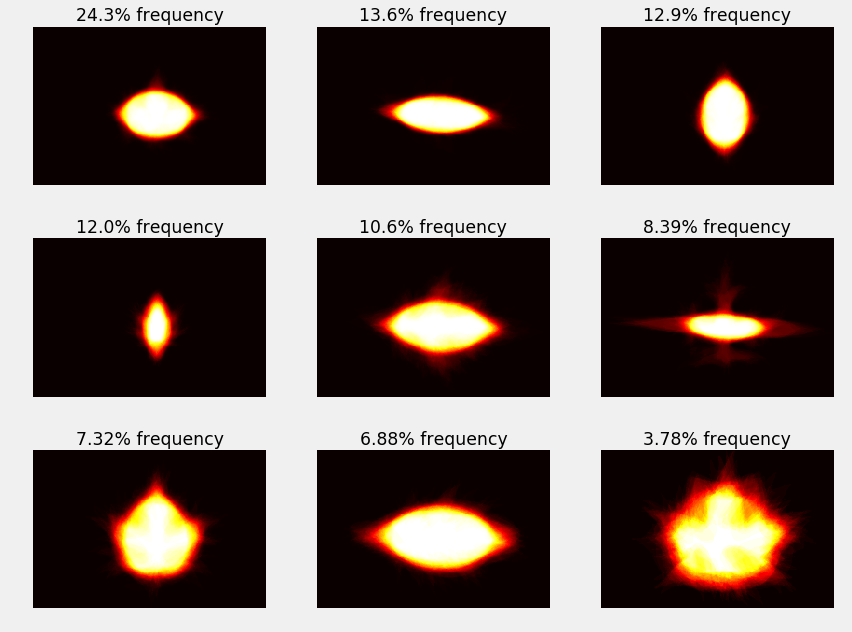

In [20]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12,9)

templateModel = KmeansModel(X, numClusters=9, objectPixels=objectPixels)
templateModel.ShowTemplates(numTemplatesToShow=9)

### For K=16:

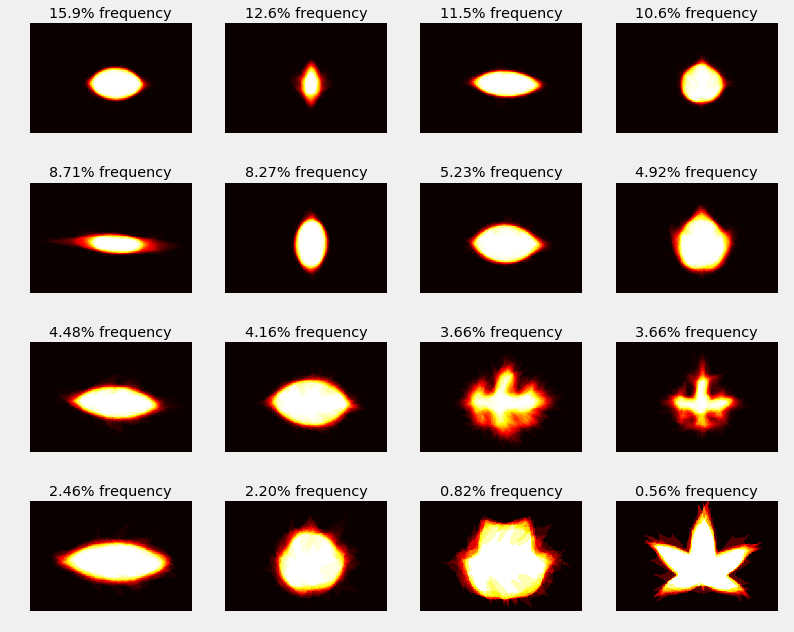

In [21]:
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (11,9)

templateModel = KmeansModel(X, numClusters=16, objectPixels=objectPixels)
templateModel.ShowTemplates(numTemplatesToShow=16)

### For K=36:

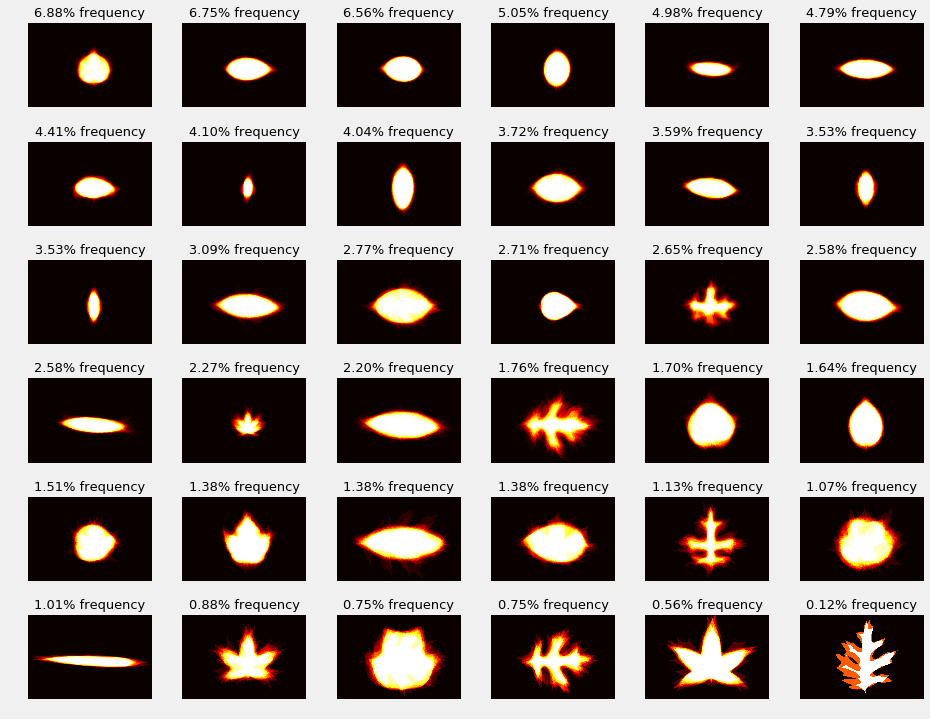

In [22]:
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['figure.figsize'] = (13,10)

templateModel = KmeansModel(X, numClusters=36, objectPixels=objectPixels)
templateModel.ShowTemplates(numTemplatesToShow=36)

### Model Reconstructions:

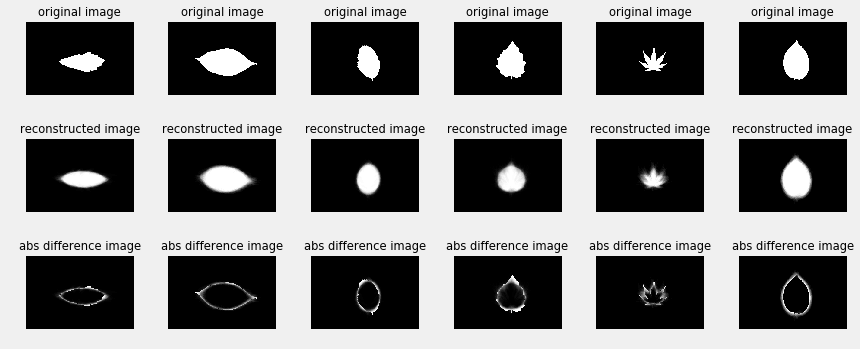

In [23]:
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (12,5)

templateModel.ShowReconstructions(X, numReconstructions=6)

### Now let's visualize how these cluster center look like in the original high dimensional space

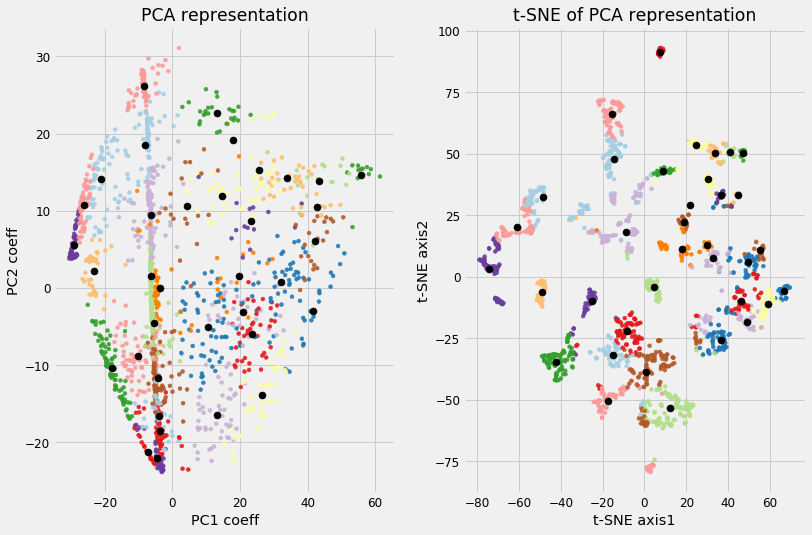

In [24]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12,8)

templateModel.ShowTemplatesInPCASpace(X, y=None, tSNE_perplexity=15.0, colorMap='Paired')

### Visualize "distance from cluster centers" feature space

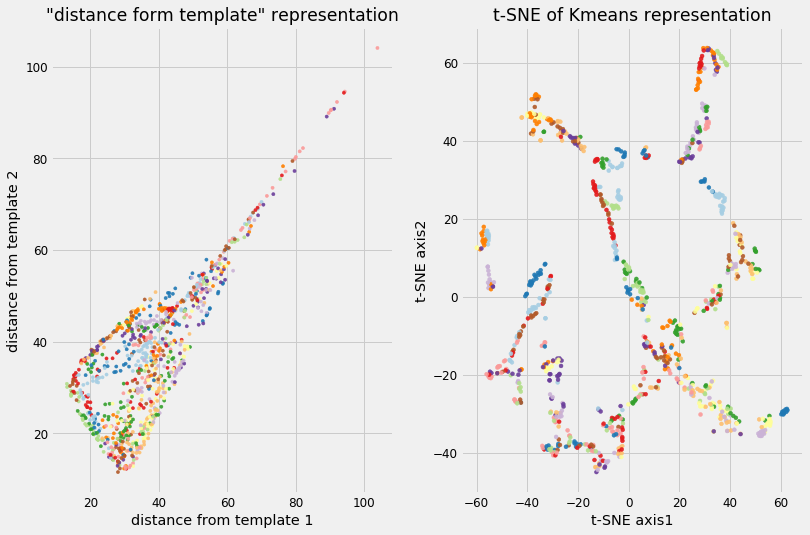

In [25]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12,8)

X_train = X[trainIDs-1,:]
y_train = trainLabels

templateModel.ShowDataScatterPlotsWithTSNE(X=X_train, y=y_train, tSNE_perplexity=15.0, colorMap='Paired')

### Show Model Accuracy as function of number of clusters used

Text(0.5,1,'accuracy as function of num Clusters')

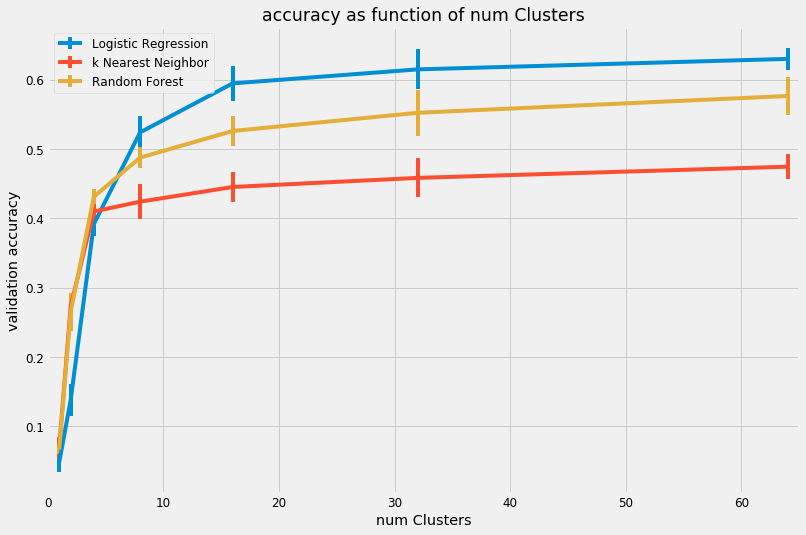

In [26]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12,8)

numClustersToUse = [1,2,4,8,16,32,64]

logReg = linear_model.LogisticRegression(C=10.0)
kNN = neighbors.KNeighborsClassifier(n_neighbors=7)
RF = ensemble.RandomForestClassifier(n_estimators=100)

logRegMeanAccuracy = []; kNN_MeanAccuracy = []; RF_MeanAccuracy = []
logRegAccuracyStd  = []; kNN_AccuracyStd  = []; RF_AccuracyStd  = []

for k in numClustersToUse:
    stratifiedCV = model_selection.StratifiedKFold(n_splits=5, random_state=1)
    logRegAccuracy = []; kNN_Accuracy = []; RF_Accuracy = []
    
    templateModel = KmeansModel(X_train, numClusters=k)
    X_kmeans_train = templateModel.RepresentUsingModel(X_train, representationMethod='distFromAllClusters')
    
    for trainInds, validInds in stratifiedCV.split(X_kmeans_train, y_train):
        X_train_cv = X_kmeans_train[trainInds,:]
        X_valid_cv = X_kmeans_train[validInds,:]

        y_train_cv = y_train[trainInds]
        y_valid_cv = y_train[validInds]

        logReg.fit(X_train_cv, y_train_cv)
        kNN.fit(X_train_cv, y_train_cv)
        RF.fit(X_train_cv, y_train_cv)
    
        logRegAccuracy.append(accuracy_score(y_valid_cv, logReg.predict(X_valid_cv)))
        kNN_Accuracy.append(accuracy_score(y_valid_cv, kNN.predict(X_valid_cv)))
        RF_Accuracy.append(accuracy_score(y_valid_cv, RF.predict(X_valid_cv)))

    logRegMeanAccuracy.append(np.array(logRegAccuracy).mean())
    logRegAccuracyStd.append(np.array(logRegAccuracy).std())

    kNN_MeanAccuracy.append(np.array(kNN_Accuracy).mean())
    kNN_AccuracyStd.append(np.array(kNN_Accuracy).std())

    RF_MeanAccuracy.append(np.array(RF_Accuracy).mean()) 
    RF_AccuracyStd.append(np.array(RF_Accuracy).std())
        
plt.figure()
plt.errorbar(x=numClustersToUse, y=logRegMeanAccuracy, yerr=logRegAccuracyStd)
plt.errorbar(x=numClustersToUse, y=kNN_MeanAccuracy  , yerr=kNN_AccuracyStd)
plt.errorbar(x=numClustersToUse, y=RF_MeanAccuracy   , yerr=RF_AccuracyStd)
plt.xlim(min(numClustersToUse)-1,max(numClustersToUse)+1); plt.legend(['Logistic Regression','k Nearest Neighbor','Random Forest'],loc=2)
plt.xlabel('num Clusters'); plt.ylabel('validation accuracy'); plt.title('accuracy as function of num Clusters')

# Classification Showdown

https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn

*you optimized a regression system, you improved a digit image classifier, and you even built a spam classifier from scratch - all this without knowing how they actually work. Indeed, in many situations you don't really need to know the implementation details.* - Chapter 4.

## Which Classifier is Should I Choose?
This is one of the most import questions to ask when approaching a machine learning problem. I find it easier to just test them all at once. Here's 10 of your favorite Scikit-Learn algorithms applied to the leaf data.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Data Preparation

In [28]:
# Swiss army knife function to organize the data

def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           # encode species strings
    classes = list(le.classes_)                    # save column names for submission
    test_ids = test.id                             # save test ids for submission
    
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)
train.head(1)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.0,0.00293,0.00293,0.035156,0.0,0.0,0.004883,0.0,0.025391


## Stratified Train/Test Split

Stratification is necessary for this dataset because there is a relatively large number of classes (99 classes for 990 samples). This will ensure we have all classes represented in both the train and test indices.

In [29]:
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

## Sklearn Classifier Showdown¶
Simply looping through 10 out-of-the box classifiers and printing the results. Obviously, these will perform much better after tuning their hyperparameters, but this gives you a decent ballpark idea.

In [30]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 88.8889%
Log Loss: 1.5755075129933762
SVC
****Results****
Accuracy: 81.8182%
Log Loss: 4.606696711201862
NuSVC
****Results****
Accuracy: 88.3838%
Log Loss: 2.4729533704334905
DecisionTreeClassifier
****Results****
Accuracy: 70.7071%
Log Loss: 10.117419348004239
RandomForestClassifier
****Results****
Accuracy: 89.8990%
Log Loss: 1.1007878459557656
AdaBoostClassifier
****Results****
Accuracy: 4.5455%
Log Loss: 4.202877746190806
GradientBoostingClassifier
****Results****
Accuracy: 57.0707%
Log Loss: 2.452281553671206
GaussianNB
****Results****
Accuracy: 57.0707%
Log Loss: 14.827252492813216
LinearDiscriminantAnalysis
****Results****
Accuracy: 97.9798%
Log Loss: 0.9301977763139301
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 4.0404%
Log Loss: 33.14327027794469


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


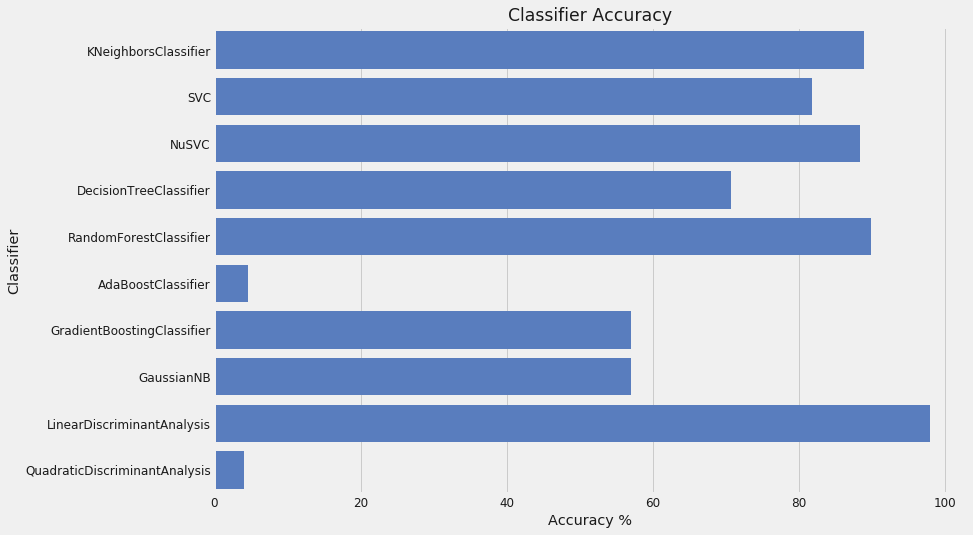

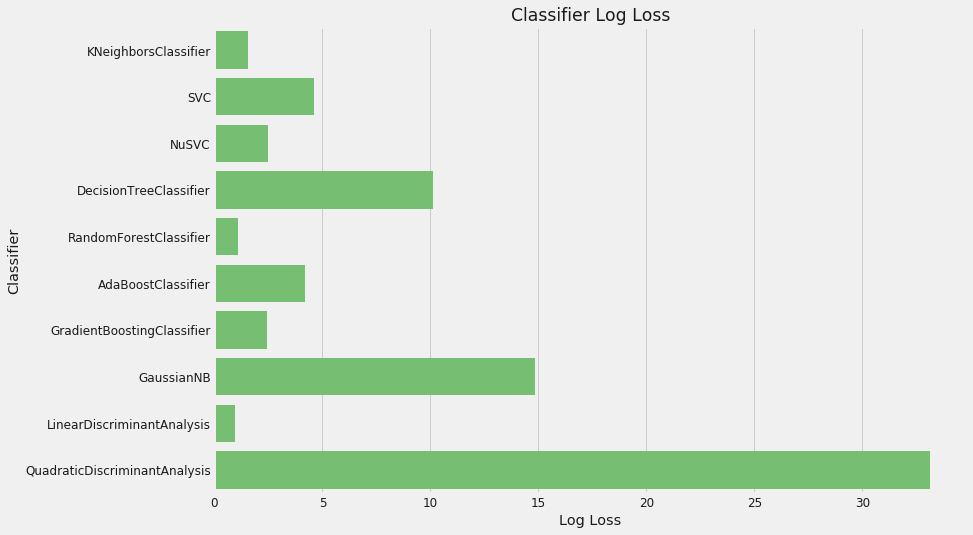

In [31]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()